In [172]:
import numpy as np
from scipy.sparse import lil_matrix
import scipy.sparse
import matplotlib.pyplot as plt
import networkx as nx
from tfgraph import *
import time
import copy
from PIL import Image
from doge_admm import *

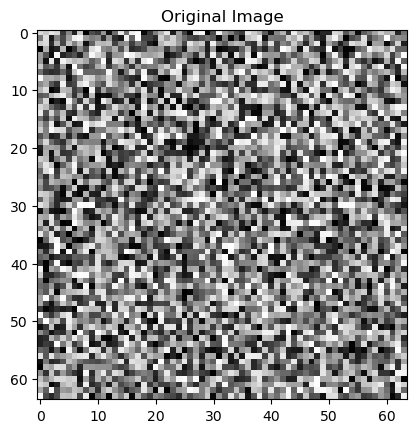

8064

In [178]:
m=64
n=64
k=1
image = np.random.rand(m, n)  # 生成一个 mxn 的随机图片
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()
L = generate_L(image)
D = generate_D(image)
delta_loss = generate_delta(D,L,1)
delta = generate_delta(D,L,k)
delta.shape[0]

In [209]:
z,Loss,iter,Time = fast_ADMM(image, rho=1,l=10, max_iter=20, k=1, tol=1e-10)
z_doge, Loss_doge, Time_doge = dogeADMM(image, rho=1, l=10,B=2, max_iter=200, k=1, threshold=1e-10,get_loss_seq = True)
z_admm, Loss_admm, Time_admm = ADMM(image, lambd=10, rho=1, max_iter=20, k=1,tol=1e-10)
z_ori, Loss_ori, iter_ori,Time_ori = ORIADMM(image, rho=1,l=10, max_iter=200, k=1, tol=1e-10)

Loss: 43644.06678323432
Time execution: 32.33765983581543
image shape: (64, 64)
iter:200
iter: 19
Loss: 43644.06678323432
Time execution: 136.9276897907257


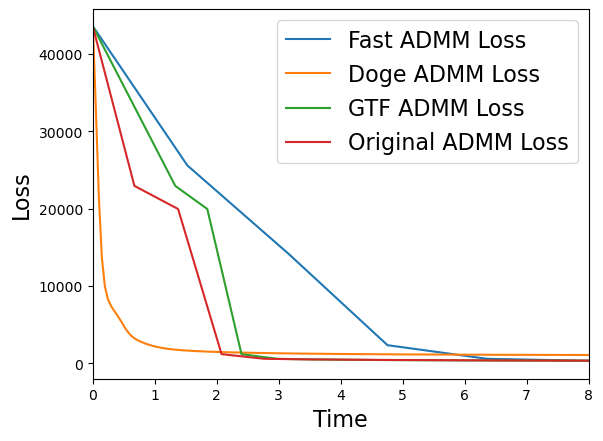

In [210]:
plt.plot(Time, Loss, label='Fast ADMM Loss')
plt.plot(Time_doge, Loss_doge, label='Doge ADMM Loss')
plt.plot(Time_admm, Loss_admm, label='GTF ADMM Loss')
plt.plot(Time_ori, Loss_ori, label='Original ADMM Loss')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Loss', fontsize=16)

plt.xlim(0, 8)

plt.legend(fontsize=16)

plt.savefig('1_loss_plot.pdf', format='pdf')
plt.show()

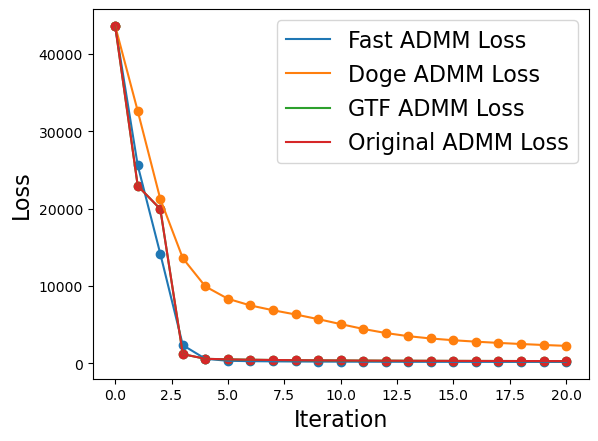

In [211]:
plt.plot(range(iter+2),Loss, label='Fast ADMM Loss') 
plt.scatter(range(iter+2),Loss)
plt.plot(range(iter+2), Loss_doge[0:21], label='Doge ADMM Loss')
plt.scatter(range(iter+2), Loss_doge[0:21]) 
plt.plot(range(iter+2), Loss_admm[0:21], label='GTF ADMM Loss')
plt.scatter(range(iter+2), Loss_admm[0:21])
plt.plot(range(iter+2), Loss_ori[0:21], label='Original ADMM Loss') 
plt.scatter(range(iter+2), Loss_ori[0:21])
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Loss', fontsize=16)

plt.legend(fontsize=16)

plt.savefig('1_iter_loss_plot.pdf', format='pdf')
plt.show()

In [212]:
z,Loss,iter,Time = fast_ADMM(image, rho=1,l=10, max_iter=20, k=0, tol=1e-10)
z_doge, Loss_doge, Time_doge = dogeADMM(image, rho=1, l=10,B=1, max_iter=100, k=0, threshold=1e-10,get_loss_seq = True)
z_admm, Loss_admm, Time_admm = ADMM(image, lambd=10, rho=1, max_iter=20, k=0)
z_ori, Loss_ori, iter_ori,Time_ori = ORIADMM(image, rho=1,l=10, max_iter=100, k=0, tol=1e-10)

Loss: 26860.590419899254
Time execution: 37.61020040512085
image shape: (64, 64)
iter:100
beta_diff: 5.51063235616954e-07
iter: 19
Loss: 26860.590419899254
Time execution: 77.7466835975647


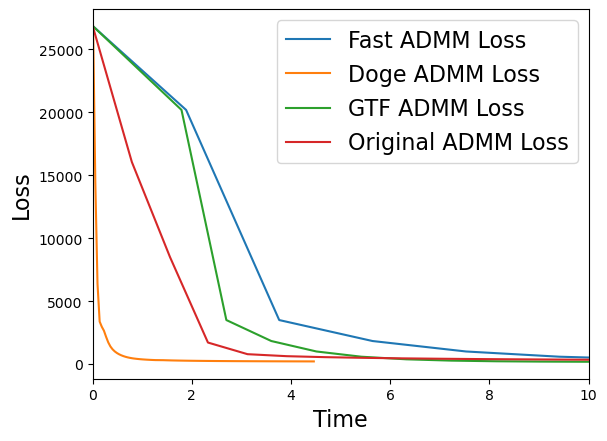

In [213]:
plt.plot(Time, Loss, label='Fast ADMM Loss') 
plt.plot(Time_doge, Loss_doge, label='Doge ADMM Loss')
plt.plot(Time_admm, Loss_admm, label='GTF ADMM Loss')

plt.plot(Time_ori, Loss_ori, label='Original ADMM Loss') 

plt.xlabel('Time', fontsize=16)
plt.ylabel('Loss', fontsize=16)


plt.xlim(0, 10)

plt.legend(fontsize=16)

plt.savefig('0_loss_plot.pdf', format='pdf')
plt.show()

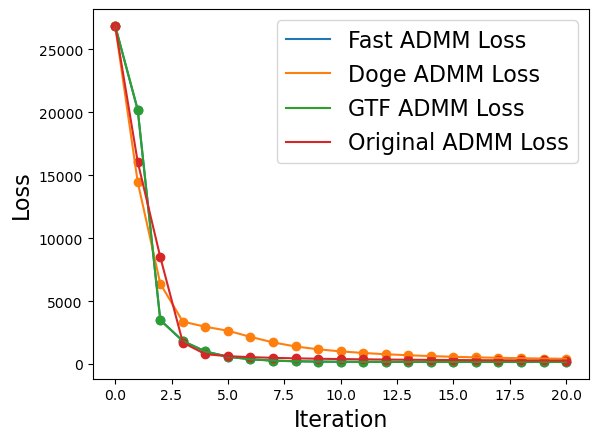

In [214]:
plt.plot(range(iter+2),Loss, label='Fast ADMM Loss')
plt.scatter(range(iter+2),Loss)
plt.plot(range(iter+2), Loss_doge[0:21], label='Doge ADMM Loss')
plt.scatter(range(iter+2), Loss_doge[0:21]) 
plt.plot(range(iter+2), Loss_admm[0:21], label='GTF ADMM Loss') 
plt.scatter(range(iter+2), Loss_admm[0:21])
plt.plot(range(iter+2), Loss_ori[0:21], label='Original ADMM Loss') 
plt.scatter(range(iter+2), Loss_ori[0:21])
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Loss', fontsize=16)

plt.legend(fontsize=16)

plt.savefig('0_iter_loss_plot.pdf', format='pdf')
plt.show()